In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 49.9 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=7ce64f2830f0157b833cc867754aac366d2bda12005898e6bd32430e4c1da6b1
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.1 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=0092965b0ccae0e2d05c2d5b644223c1c01b035a23e8dd90856a85a2193d75a0
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=3a168dc5cc4293dd09bc46b22264d6de46e563ea56658e

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.0 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [5]:
book = "The Warren Buffett Way (Second Edition) ( PDFDrive )"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Warren_Buffett"
titlename = "Warren_Buffett"

In [6]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [7]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [8]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

12
1/chapter_1


2023-04-09 13:28:42,508 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10
1/chapter_11
1/chapter_12


In [9]:
mp_bert

{'1/chapter_1': [('warren buffett', 0.6045),
  ('warren buffett wayto', 0.5635),
  ('investment beginningswarren edward buffett', 0.5627),
  ('warren buffett wayname', 0.5569),
  ('warren buffett waybuyer', 0.5554)],
 '1/chapter_2': [('warren buffett waytaught', 0.6339),
  ('warren buffett waythrough', 0.6216),
  ('warren buffett wayit', 0.6206),
  ('warren buffett waybenjamin grahamgraham', 0.6178),
  ('warren buffett waytheory', 0.6096)],
 '1/chapter_3': [('warren buffett wayand commodities', 0.6104),
  ('government employees insurance companywarren buffett', 0.5752),
  ('buffett partnership', 0.5645),
  ('warren buffett wayinsurance companies', 0.5517),
  ('warren buffett waygeneral', 0.5382)],
 '1/chapter_4': [('warren buffett waymarket', 0.5771),
  ('buffettowned stock', 0.5696),
  ('warren buffett wayavailable', 0.5446),
  ('warren buffettway', 0.5383),
  ('buffett', 0.5382)],
 '1/chapter_5': [('warren buffett waycompany', 0.6128),
  ('warren buffett', 0.6043),
  ('company buffet

In [10]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [11]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
14
14
15
15
14
15


In [12]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'buffett', 'time warren buffett', 'buffettowned stock', 'investing', 'Washington Post Company', 'warren buffett waythinking', 'superinvestors buffett', 'Berkshire Hathaway Annual', 'income securities 143bonds', 'market', 'WARREN BUFFETT', 'berkshire companies', 'yield bonds', 'succumb to thetemptation', 'convertible preferred', 'regard managers', 'portfolio management', 'courageand the conviction', 'investment philosophy', 'Warren Buffett', 'institutional imperative', 'Berkshire', 'warren buffett1', 'income securitieswarren buffett', 'portfolio', 'income investing', 'stock market value', 'warren buffett waythrough', 'money managers', 'stock market', 'thestock market', 'stock price', 'investment decisions', 'Washington Post', 'managementqualities buffett', 'Hathaway annual', 'investor sentiment', 'risk tolerance', 'earnings', 'income securities', 'warren buffett wayit', 'insurance companies', 'government employees insurance companywarren buffett', 'stock prices', 'percent increase', 'd

In [13]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Restated_To_Conform_2003': ['1/chapter_1'], 'Warren_Buffett_Wayto_2003': ['1/chapter_1'], 'Deploy_To_Makemeaningful_2003': ['1/chapter_1'], 'Predictability_2003': ['1/chapter_1'], 'Berkshire_2003': ['1/chapter_1', '1/chapter_3'], 'Berkshire_2002': ['1/chapter_9'], 'Warren_Buffett_Waybuyer_2003': ['1/chapter_1'], 'Investment_Beginningswarren_Edward_Buffett_2003': ['1/chapter_1'], 'Buffett_2003': ['1/chapter_4'], 'Warren_Buffett_2003': ['1/chapter_3', '1/chapter_4'], 'Warren_Buffett_2002': ['1/chapter_6', '1/chapter_9'], 'Warren_Buffett_1988': ['1/chapter_7'], 'Warren_Buffett_1999': ['1/chapter_11'], 'Stock_Market_2003': ['1/chapter_1'], 'Stock_Market_1929': ['1/chapter_2'], 'Stock_Market_1988': ['1/chapter_8'], 'Stock_Market_1999': ['1/chapter_11'], 'Stock_Market_2004': ['1/chapter_12'], 'Executive_Compensation_2003': ['1/chapter_1'], 'Limited_Partners_2003': ['1/chapter_1'], 'Complexmathematical_Calculations_2003': ['1/chapter_1'], 'Berkshire_Hathaway_2000

In [14]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [15]:
key_yr_chap_mp

defaultdict(list,
            {'Restated_To_Conform_2003': ['1/chapter_1'],
             'Warren_Buffett_Wayto_2003': ['1/chapter_1'],
             'Deploy_To_Makemeaningful_2003': ['1/chapter_1'],
             'Predictability_2003': ['1/chapter_1'],
             'Berkshire_2003': ['1/chapter_1', '1/chapter_3'],
             'Berkshire_2002': ['1/chapter_9'],
             'Warren_Buffett_Waybuyer_2003': ['1/chapter_1'],
             'Investment_Beginningswarren_Edward_Buffett_2003': ['1/chapter_1'],
             'Buffett_2003': ['1/chapter_4'],
             'Warren_Buffett_2003': ['1/chapter_3', '1/chapter_4'],
             'Warren_Buffett_2002': ['1/chapter_6', '1/chapter_9'],
             'Warren_Buffett_1988': ['1/chapter_7'],
             'Warren_Buffett_1999': ['1/chapter_11'],
             'Stock_Market_2003': ['1/chapter_1'],
             'Stock_Market_1929': ['1/chapter_2'],
             'Stock_Market_1988': ['1/chapter_8'],
             'Stock_Market_1999': ['1/chapter_11'],
 

In [16]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Restated_To_Conform_2003
Warren_Buffett_Wayto_2003
Deploy_To_Makemeaningful_2003
Predictability_2003
Berkshire_2003
Berkshire_2002
Warren_Buffett_Waybuyer_2003
Investment_Beginningswarren_Edward_Buffett_2003
Buffett_2003
Warren_Buffett_2003
Warren_Buffett_2002
Warren_Buffett_1988
Warren_Buffett_1999
Stock_Market_2003
Stock_Market_1929
Stock_Market_1988
Stock_Market_1999
Stock_Market_2004
Executive_Compensation_2003
Limited_Partners_2003
Complexmathematical_Calculations_2003
Berkshire_Hathaway_2000
Warren_Buffett_Wayname_2003
Investment_Partnership_1929
Company_1929
Company_2003
Company_2000
Company_1988
Warren_Buffett_Waytheory_1929
Warren_Buffett_Wayit_1929
Warren_Buffett_Waythrough_1929
Investment_Counseling_1929
Investment_Philosophy_1929
Market_Fluctuations_1929
Graham_1929
Fisher_1929
Warren_Buffett_Waybenjamin_Grahamgraham_1929
Warren_Buffett_Waytaught_1929
Warren_Buffett_Wayinsurance_Companies_2003
Buffett_Partnership_2003
Warren_Buffett_Wayand_Commodities_2003
Insurance_2003
Re

In [17]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [18]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life_and_education', 'Business_career', 'Early_business_career', 'Assuming_Berkshire', 'As_a_billionaire', '2007–08_financial_crisis', 'A_capitalized_Berkshire', 'COVID-19_pandemic', 'Investment_philosophy', 'Index_funds_vis-à-vis_active_management', 'Using_investment_banks', 'Personal_life', 'Health', 'Wealth_and_philanthropy', 'Political_and_public_policy_views', 'Health_care', 'Curbing_population_growth', 'Taxes', 'Dollar_and_gold', 'China', 'Tobacco', 'Coal', 'Renewable_energy', 'Expensing_of_stock_options', 'Technology', 'Bitcoin_and_cryptocurrencies', 'Film_and_television', 'Bibliography', 'Books_about_Buffett', 'See_also', 'References', 'Further_reading', 'External_links']


In [19]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [20]:
mp_sim_score

{'Early_life_and_education->Warren_Buffett_Wayto_2003': tensor(0.7272, device='cuda:0'),
 'Early_life_and_education->Predictability_2003': tensor(0.1440, device='cuda:0'),
 'Early_life_and_education->Berkshire_2003': tensor(0.6336, device='cuda:0'),
 'Early_life_and_education->Berkshire_2002': tensor(0.4701, device='cuda:0'),
 'Early_life_and_education->Warren_Buffett_Waybuyer_2003': tensor(0.7440, device='cuda:0'),
 'Early_life_and_education->Investment_Beginningswarren_Edward_Buffett_2003': tensor(0.7415, device='cuda:0'),
 'Early_life_and_education->Buffett_2003': tensor(0.5997, device='cuda:0'),
 'Early_life_and_education->Warren_Buffett_2003': tensor(0.5878, device='cuda:0'),
 'Early_life_and_education->Warren_Buffett_2002': tensor(0.4503, device='cuda:0'),
 'Early_life_and_education->Warren_Buffett_1988': tensor(0.5423, device='cuda:0'),
 'Early_life_and_education->Warren_Buffett_1999': tensor(0.5655, device='cuda:0'),
 'Early_life_and_education->Stock_Market_2003': tensor(0.4666

In [21]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [22]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [23]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [24]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

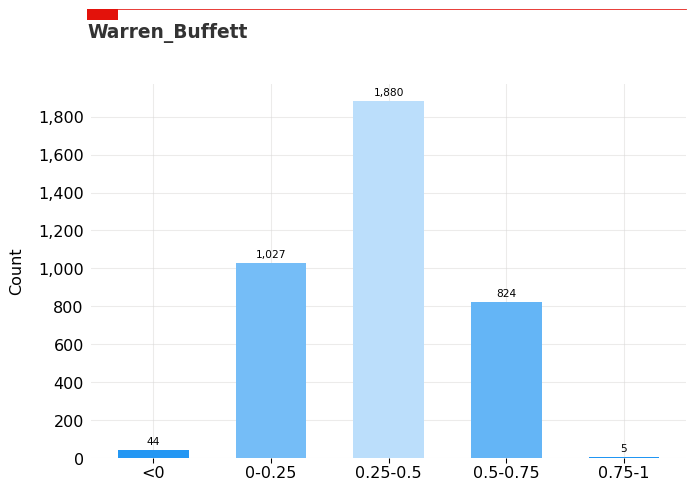

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [26]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life_and_education': 1945, 'Business_career': -1, 'Early_business_career': 1956, 'Assuming_Berkshire': 1975, 'As_a_billionaire': 2005, '2007–08_financial_crisis': 2008, 'A_capitalized_Berkshire': 2011, 'COVID-19_pandemic': 2021, 'Investment_philosophy': 1999, 'Index_funds_vis-à-vis_active_management': 2012, 'Using_investment_banks': -1, 'Personal_life': 2006, 'Health': 2012, 'Wealth_and_philanthropy': 2008, 'Political_and_public_policy_views': 2015, 'Health_care': 2009, 'Curbing_population_growth': 2009, 'Taxes': 2006, 'Dollar_and_gold': 2000, 'China': 2008, 'Tobacco': 1990, 'Coal': 2007, 'Renewable_energy': -1, 'Expensing_of_stock_options': 2004, 'Technology': 2012, 'Bitcoin_and_cryptocurrencies': 2018, 'Film_and_television': 2012, 'Bibliography': -1, 'Books_about_Buffett': 2008, 'See_also': -1, 'References': -1, 'Further_reading': -1}


In [27]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [28]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


127


In [29]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life_and_education   ->  100
Early_business_career   ->  105
Assuming_Berkshire   ->  114
As_a_billionaire   ->  109
2007–08_financial_crisis   ->  118
A_capitalized_Berkshire   ->  113
COVID-19_pandemic   ->  89
Investment_philosophy   ->  114
Index_funds_vis-à-vis_active_management   ->  108
Using_investment_banks   ->  110
Personal_life   ->  33
Health   ->  52
Wealth_and_philanthropy   ->  95
Political_and_public_policy_views   ->  79
Health_care   ->  53
Curbing_population_growth   ->  81
Taxes   ->  101
Dollar_and_gold   ->  95
China   ->  122
Tobacco   ->  108
Coal   ->  11
Renewable_energy   ->  54
Expensing_of_stock_options   ->  47
Technology   ->  117
Bitcoin_and_cryptocurrencies   ->  61
Film_and_television   ->  68
Books_about_Buffett   ->  77


In [30]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [31]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life_and_education  ->   ['Warren_Buffett_Wayit_1929', 'Warren_Buffett_Waythrough_1929', 'Warren_Buffett_Waybenjamin_Grahamgraham_1929', 'Warren_Buffett_Waytaught_1929', 'Warren_Buffett_Waytheory_1929']
Early_business_career  ->   ['Graham_1929', 'Market_Fluctuations_1929', 'Stock_Market_1929', 'Fisher_1929', 'Investment_Counseling_1929']
Assuming_Berkshire  ->   ['Investment_Partnership_1929', 'Portfolio_1971', 'Modern_Portfolio_1971', 'Portfolio_Theory_1971']
As_a_billionaire  ->   ['Money_Managers_2004', 'Berkshire_Hathaway_Annual_2004', 'Warren_Buffett_Revealedthe_2004', 'Superinvestors_Buffett_2004', 'Warren_Buffett1_2004']
A_capitalized_Berkshire  ->   ['Earningsto_Shareholders_1988', 'Percentof_Operating_Earnings_1988']
COVID-19_pandemic  ->   ['Percent_Increase_2002']
Investment_philosophy  ->   ['Warren_Buffett_1999', 'Psychologyof_Moneythe_Study_1999', 'Investor_Behavior_1999', 'Stock_Market_1999', 'Investment_Decisions_1999']
Index_funds_vis-à-vis_active_management  ->

In [32]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [33]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [34]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [35]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Stock Price', 'Berkshire', 'Stock Market', 'Company', 'Warren Buffett']
5
{'Early_life_and_education': 0, 'Early_business_career': 1, 'Assuming_Berkshire': 0, 'As_a_billionaire': 0, 'A_capitalized_Berkshire': 0, 'COVID-19_pandemic': 0, 'Investment_philosophy': 2, 'Index_funds_vis-à-vis_active_management': 0, 'Taxes': 0, 'Dollar_and_gold': 0, 'China': 0, 'Tobacco': 0, 'Expensing_of_stock_options': 0, 'Technology': 0}


In [36]:
print(sum(list(mp2.values())))

3


In [37]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life_and_education': set(), 'Early_business_career': set(), 'Assuming_Berkshire': set(), 'As_a_billionaire': set(), 'A_capitalized_Berkshire': set(), 'COVID-19_pandemic': set(), 'Investment_philosophy': set(), 'Index_funds_vis-à-vis_active_management': set(), 'Taxes': set(), 'Dollar_and_gold': set(), 'China': set(), 'Tobacco': set(), 'Expensing_of_stock_options': set(), 'Technology': set()}
{'Early_life_and_education': 0, 'Early_business_career': 0, 'Assuming_Berkshire': 0, 'As_a_billionaire': 0, 'A_capitalized_Berkshire': 0, 'COVID-19_pandemic': 0, 'Investment_philosophy': 0, 'Index_funds_vis-à-vis_active_management': 0, 'Taxes': 0, 'Dollar_and_gold': 0, 'China': 0, 'Tobacco': 0, 'Expensing_of_stock_options': 0, 'Technology': 0}
0


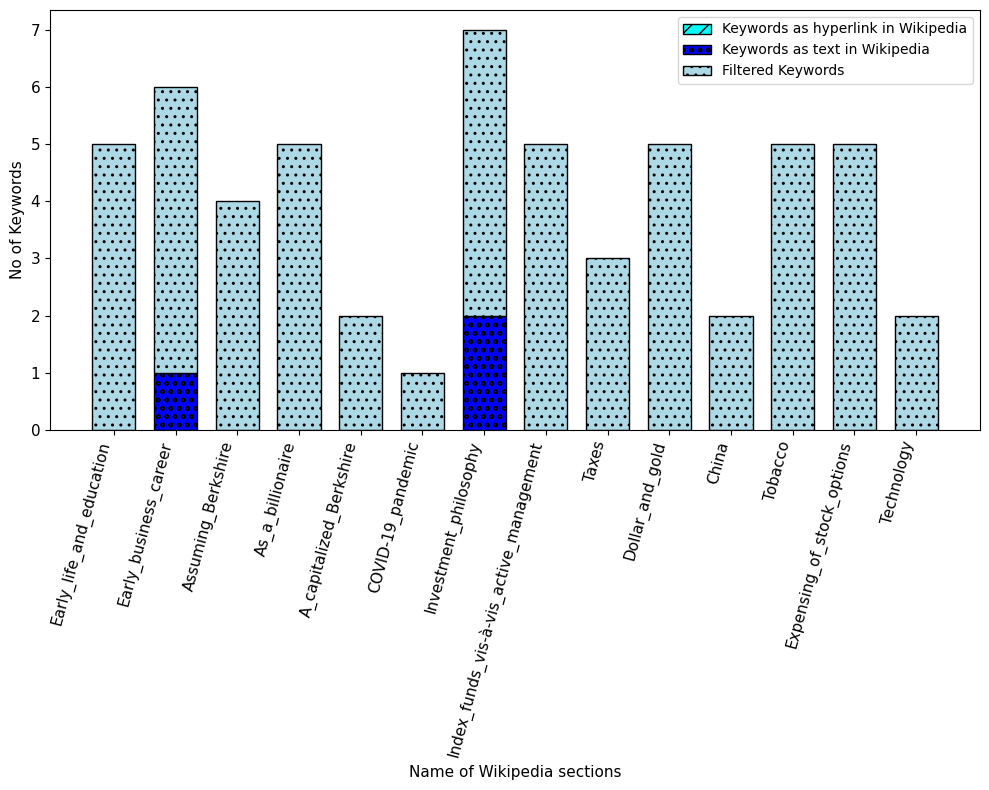

In [38]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [39]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Warren_Buffett_Waythrough', 'Thestock_Market', 'Common_Stocks', 'Portfolio_Theory', 'Market_Fluctuations', 'Investor_Behavior', 'Investment_Partnership', 'Money_Managers', 'Warren_Buffett_Wayit', 'Portfolio_Management', 'Warren_Buffett_Waycompany', 'Understand', 'Predictability', 'Percent_Increase', 'Graham', 'Earningsto_Shareholders', 'Warren_Buffett_Waythinking', 'Warren_Buffett_Waytaught', 'Berkshire_Hathaway', 'Warren_Buffett_Waymarket', 'Company_Buffett', 'Hathaway_Annual_Report', 'Executive_Compensation', 'Modern_Portfolio_Theorywarren_Buffett', 'Portfolio', 'Term_Prospects', 'Investment_Counseling', 'Buffettowned_Stock', 'Warren_Buffett_Waytheory', 'Stock_Market', 'Insurance_Industry', 'Invested_Capital', 'Modern_Portfolio', 'Fisher', 'Stock_Price', 'Warren_Buffett_Waybenjamin_Grahamgraham', 'Warren_Buffett_Revealedthe', 'Superinvestors_Buffett', 'Warren_Buffett_Waybig_Mistakes', 'Warren_Buffett', 'Investment_Decisions', 'Warren_Buffett_Wayavailable', 'Washington_Post_Company'

In [40]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

854
{'Help:Authority_control', 'Securities_and_Exchange_Commission', 'The_Coca-Cola_Company', 'Precision_Castparts_Corp.', 'Michael_Bloomberg', 'Category:Directors_of_Berkshire_Hathaway', 'Robert_W._Gore', 'Michigan', 'Prostate_cancer', 'Oval_Office', 'McAllen,_Texas', 'Class_B_share', 'Category:All_articles_with_dead_external_links', 'Rohm_%26_Haas', 'Mark_Zuckerberg', 'Special:BookSources/978-0-470-15262-1', 'Category:Equity_securities', 'Carlton_Forge_Works', 'Chair_(official)', 'Template:Buffett_family', 'The_Slate_Group', 'Second_Sudanese_Civil_War', 'Special:BookSources/0-06-016172-8', 'Goldman_Sachs', 'The_CW', 'EBay', 'The_Snowball:_Warren_Buffett_and_the_Business_of_Life', 'The_Giving_Pledge', 'Subprime_mortgage_crisis', 'Kaplan_Inc', 'Special:BookSources/9781440631474', 'Pennsylvania', 'Margin_of_safety_(financial)', 'BYD_Company', 'Estate_tax_in_the_United_States', 'Special:BookSources/978-0-471-46511-9', 'Rediff.com', 'American_Philosophical_Society', 'Template:Cite_journal

In [41]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Berkshire_Hathaway'}


1

In [42]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Investment_Partnership_1929', 'Warren_Buffett_Waytaught_1929', 'Fisher_1929', 'Stock_Price_2000', 'Graham_1929', 'Investor_Behavior_1999', 'Washington_Post_Company_2004', 'Warren_Buffett_Waymarket_2003', 'Common_Stocks_2004', 'Warren_Buffett_1999', 'Portfolio_Theory_1971', 'Thestock_Market_1988', 'Stock_Market_1999', 'Warren_Buffett_Waythrough_1929', 'Modern_Portfolio_1971', 'Warren_Buffett1_2004', 'Understand_2003', 'Warren_Buffett_Revealedthe_2004', 'Warren_Buffett_Waybig_Mistakes_2000', 'Time_Warren_Buffett_1971', 'Warren_Buffett_Wayit_1929', 'Warren_Buffett_Waysecurities_1988', 'Term_Prospects_2000', 'Predictability_2003', 'Psychologyof_Moneythe_Study_1999', 'Insurance_Industry_2003', 'Investment_Counseling_1929', 'Invested_Capital_2000', 'Stock_Price_1988', 'Warren_Buffett_Waythinking_1971', 'Investment_Decisions_1999', 'Money_Managers_2004', 'Warren_Buffett_Waycompany_2000', 'Stock_Market_1929', 'Berkshire_Hathaway_2000', 'Executive_Compensation_2003', 'Portfolio_1971', 'Warren

In [43]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Predictability_2003': ['1/chapter_1'], 'Warren_Buffett_1988': ['1/chapter_7'], 'Warren_Buffett_1999': ['1/chapter_11'], 'Stock_Market_1929': ['1/chapter_2'], 'Stock_Market_1988': ['1/chapter_8'], 'Stock_Market_1999': ['1/chapter_11'], 'Executive_Compensation_2003': ['1/chapter_1'], 'Berkshire_Hathaway_2000': ['1/chapter_5'], 'Investment_Partnership_1929': ['1/chapter_2'], 'Warren_Buffett_Waytheory_1929': ['1/chapter_2'], 'Warren_Buffett_Wayit_1929': ['1/chapter_2'], 'Warren_Buffett_Waythrough_1929': ['1/chapter_2'], 'Investment_Counseling_1929': ['1/chapter_2'], 'Market_Fluctuations_1929': ['1/chapter_2'], 'Graham_1929': ['1/chapter_2'], 'Fisher_1929': ['1/chapter_2'], 'Warren_Buffett_Waybenjamin_Grahamgraham_1929': ['1/chapter_2'], 'Warren_Buffett_Waytaught_1929': ['1/chapter_2'], 'Insurance_Industry_2003': ['1/chapter_3'], 'Understand_2003': ['1/chapter_4'], 'Buffettowned_Stock_2003': ['1/chapter_4'], 'Warren_Buffett_Waymarket_2003': ['1/chapter_4'], 'Washington_Post_Company_2004':

In [44]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['investment partnership', 'warren buffett waytaught', 'fisher', 'stock price', 'graham', 'investor behavior', 'washington post company', 'warren buffett waymarket', 'common stocks', 'warren buffett', 'portfolio theory', 'thestock market', 'stock market', 'warren buffett waythrough', 'modern portfolio', 'warren buffett1', 'understand', 'warren buffett revealedthe', 'warren buffett waybig mistakes', 'time warren buffett', 'warren buffett wayit', 'warren buffett waysecurities', 'term prospects', 'predictability', 'psychologyof moneythe study', 'insurance industry', 'investment counseling', 'invested capital', 'stock price', 'warren buffett waythinking', 'investment decisions', 'money managers', 'warren buffett waycompany', 'stock market', 'berkshire hathaway', 'executive compensation', 'portfolio', 'warren buffett wayof concepts', 'buffettowned stock', 'stock market', 'percentof operating earnings', 'superinvestors buffett', 'berkshire hathaway annual', 'earningsto shareholders', 'market

In [45]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

10
54
0.18518518518518517
